# Create Jpeg Dataset
---

### Imports
---

In [2]:
from src.libs.project_libs import *

### Globals
---

In [4]:
image_dir = "/home/franec94/Documents/thesys-siren/data/testsets/BSD68"
image_name = "test068.png"

image_file_path = os.path.join(image_dir, image_name)
result = check_file_exists(file_path=image_file_path, raise_exception=True)
if result:
    print(f"Target File -> '{image_file_path}' , it exists!")
    pass

Target File -> '/home/franec94/Documents/thesys-siren/data/testsets/BSD68/test068.png' , it exists!


In [6]:
OUT_DIR_DATASET = "/home/franec94/Documents/thesys-siren/codebase/notebooks/test066_airplane/create_datasets/create_jpeg_datasets/out/datasets"
image_file_path=None

if image_file_path:
    image_name = os.path.basename(image_file_path)
    image_name, _ = os.path.splitext(image_name)
else:
    image_name = "cameramen"
    pass
OUT_DIR_DATASET = os.path.join(f"{OUT_DIR_DATASET}", f"{image_name}")
try:
    print(f"Creating out dataset dir location: {OUT_DIR_DATASET}")
    os.makedirs(OUT_DIR_DATASET)
    pass
except Exception as err:
    print(f"{str(err)}")
    pass

Creating out dataset dir location: /home/franec94/Documents/thesys-siren/codebase/notebooks/test066_airplane/create_datasets/create_jpeg_datasets/out/datasets/cameramen
[Errno 17] File exists: '/home/franec94/Documents/thesys-siren/codebase/notebooks/test066_airplane/create_datasets/create_jpeg_datasets/out/datasets/cameramen'


### Tasks
---

**Define Target Image Location**

**Show Image Selected**

In [8]:
# image_file_path=None
target_image = load_target_image(image_file_path=image_file_path)

In [10]:
target_im_table = get_image_details_as_table(image=target_image)
print(target_im_table)

|:-----------|:-----------|
| name       | Camera     |
| shape      | (512, 512) |
| size_byte  | 262144     |
| image_band | ('L',)     |


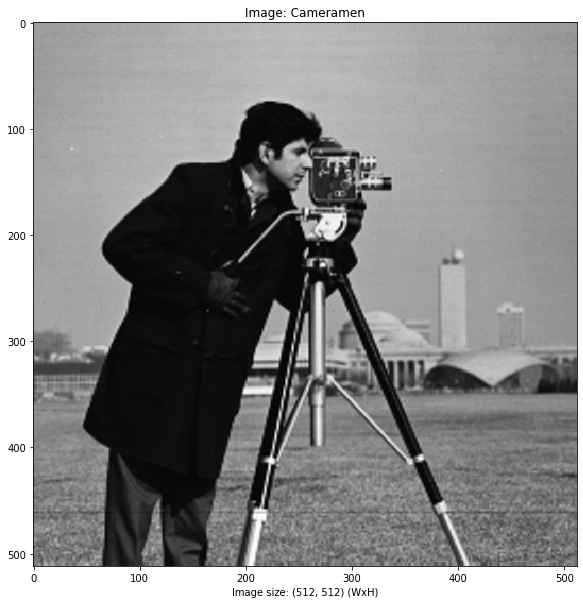

In [12]:
image_name = None
if image_file_path:
    filename = os.path.basename(image_file_path)
    image_name, _ = os.path.splitext(filename)
else:
    filename = "Cameramen"
    image_name="cameramen"
    pass

fig = plt.figure(figsize=(10, 10))
plt.imshow(target_image,
          cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.title(f"Image: {filename}")
plt.xlabel(f"Image size: {target_image.size} (WxH)")
plt.show();

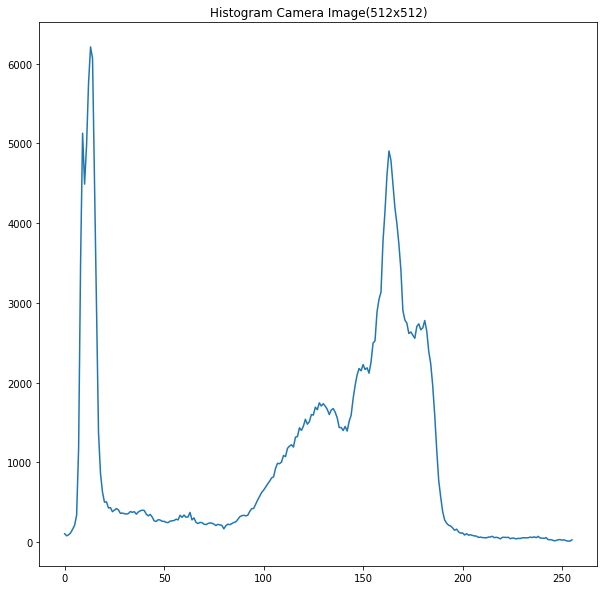

In [14]:
fig = get_histogram_image(image=target_image)

**Crop by its center target image**

In [16]:
cropped_image = \
    get_cropped_by_center_image(\
        im=target_image, target=256)

In [18]:
cropped_im_table = get_image_details_as_table(image=cropped_image)
print(cropped_im_table)

|:-----------|:-----------|
| name       | Camera     |
| shape      | (256, 256) |
| size_byte  | 65536      |
| image_band | ('L',)     |


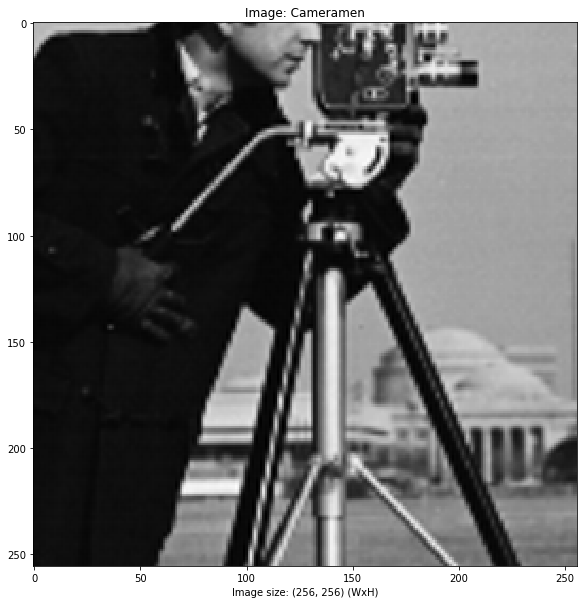

In [20]:
if image_file_path:
    filename = os.path.basename(image_file_path)
else:
    filename = "Cameramen"
    pass

fig = plt.figure(figsize=(10, 10))
plt.imshow(cropped_image,
          cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.title(f"Image: {filename}")
plt.xlabel(f"Image size: {cropped_image.size} (WxH)")
plt.show();

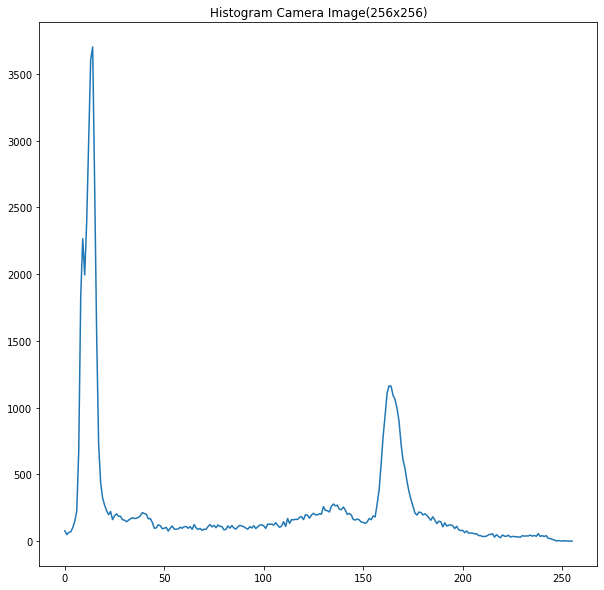

In [22]:
fig = get_histogram_image(image=cropped_image)

In [24]:
_, compressed_file_size_bits = calculate_cropped_image_size(image=cropped_image)
print("File size cropped image:", compressed_file_size_bits, "Bits")

File size cropped image: 254000 Bits


In [26]:
qualities = np.arange(20, 95+1)
result_tuples, failure_qualities = calculate_several_jpeg_compression(
    image=cropped_image,
    image_dim_bits=compressed_file_size_bits,
    qualities=qualities, image_name=image_name
)
if len(failure_qualities) != 0:
    print(f"Some qualities have failed")
    pass
jpeg_df = pd.DataFrame(data=result_tuples)

SyntaxError: invalid syntax (<ipython-input-26-eb3500928c0b>, line 6)

In [14]:
pd.concat([jpeg_df.head(5), jpeg_df.tail(5)], axis = 0)

,mse,psnr,ssim,quality,file_size_bits,bpp,width,heigth,CR
0,30.618301,33.270993,0.939424,20,33064,0.504517,256,256,7.682071
1,28.949783,33.514350,0.940436,21,33968,0.518311,256,256,7.477626
2,27.839966,33.684117,0.941620,22,34736,0.530029,256,256,7.312298
3,26.316681,33.928492,0.944786,23,35408,0.540283,256,256,7.173520
4,25.208344,34.115361,0.946817,24,36000,0.549316,256,256,7.055556
71,1.694931,45.839283,0.993285,91,119528,1.823853,256,256,2.125025
72,1.493744,46.388042,0.993804,92,123880,1.890259,256,256,2.050371
73,1.274261,47.078218,0.994504,93,133928,2.043579,256,256,1.896541
74,1.072327,47.827533,0.995091,94,145448,2.219360,256,256,1.746329
75,0.878433,48.693716,0.995725,95,158904,2.424683,256,256,1.598449


In [15]:
jpeg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 9 columns):
mse               76 non-null float64
psnr              76 non-null float64
ssim              76 non-null float64
quality           76 non-null int64
file_size_bits    76 non-null int64
bpp               76 non-null float64
width             76 non-null int64
heigth            76 non-null int64
CR                76 non-null float64
dtypes: float64(5), int64(4)
memory usage: 5.4 KB


In [16]:
jpeg_df.describe()

,mse,psnr,ssim,quality,file_size_bits,bpp,width,heigth,CR
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.0,76.000000
mean,10.952380,38.958074,0.973053,57.500000,64342.105263,0.981783,256.0,256.0,4.531178
std,7.404750,3.630861,0.014517,22.083176,27294.892697,0.416487,0.0,0.0,1.526268
min,0.878433,33.270993,0.939424,20.000000,33064.000000,0.504517,256.0,256.0,1.598449
25%,5.122234,36.383586,0.964009,38.750000,45566.000000,0.695282,256.0,256.0,3.406886
50%,9.665543,38.278855,0.974226,57.500000,55928.000000,0.853394,256.0,256.0,4.541983
75%,14.953762,41.037810,0.984337,76.250000,74570.000000,1.137848,256.0,256.0,5.574469
max,30.618301,48.693716,0.995725,95.000000,158904.000000,2.424683,256.0,256.0,7.682071


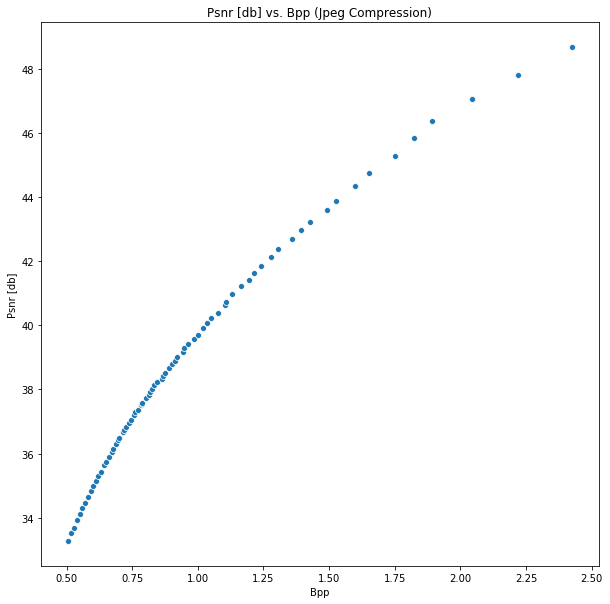

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(data=jpeg_df, x="bpp", y="psnr", ax=ax)

plt.title("Psnr [db] vs. Bpp (Jpeg Compression)")
plt.ylabel("Psnr [db]")
plt.xlabel("Bpp")
plt.show();

In [18]:
csv_filename = os.path.join(OUT_DIR_DATASET, "dataset.csv")
jpeg_df.to_csv(csv_filename)